3.1 Model Regresi Sederhana

Membaca data dari file CSV

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path="/content/gdrive/MyDrive/Praktikum_ML/Praktikum03"

In [3]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/Praktikum_ML/Praktikum03/data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Melihat informasi umum pada data

In [4]:
# Mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


Menghitung statistik pada kolom numeric dengan describe

In [5]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Data Pre-processing

In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


Membagi Dataset untuk Training dan Test

In [7]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]]
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# cetak data training
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


Training Model

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Model

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("koefisien (kg per cm):", model.coef_[0])
print("intercept (kg):       ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

koefisien (kg per cm): 0.5518232618278286
intercept (kg):        -37.657088783833586
R2 (test):             0.24989263013277574
MAE (kg):              3.6704107898943548
RMSE (kg):             4.609006140308042


Persamaan Regresi

In [10]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")


Persamaan: y = 0.552 * x + -37.657


Plot Regresi

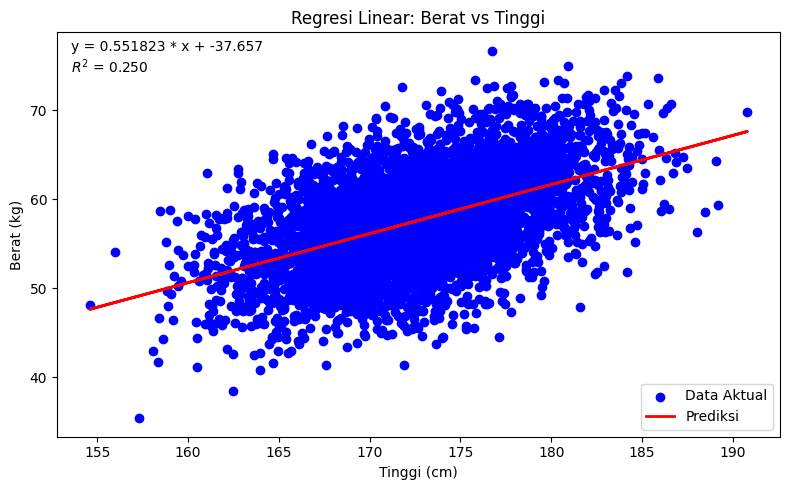

In [11]:
# plot regresi
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [12]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil ["Berat Prediksi (kg)"] - hasil ["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil ["Berat aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


Data Testing dari Mahasiswa TI 2024

In [13]:
data = pd.read_csv('/content/gdrive/MyDrive/Praktikum_ML/Praktikum03/data/data_anak_ti.csv')

y_pred = model.predict(data[["tinggi_cm"]])
data["prediksi_kg"]= y_pred
data["Selisih error (kg)"] = data["prediksi_kg"] - data["actual_berat_kg"]
denom = data["actual_berat_kg"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

,No,Nama,tinggi_cm,actual_berat_kg,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049219,-3.450781,94.101229
1,2,Tiara,162,78.5,51.738280,-26.761720,65.908636
2,3,Tia,155,52.7,47.875517,-4.824483,90.845383
3,4,Keyla,160,70.3,50.634633,-19.665367,72.026505
4,5,Bani,183,65.8,63.326568,-2.473432,96.240985


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [15]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


3.2 Multiple Linear Regresi

Membca data file CSV

In [16]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum_ML/Praktikum03/data/stunting_wasting_dataset.csv')

# cetak header data (5 baris data) dari file
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


Menghitung statistik deskriptif pada kolom numeric dengan describe

In [17]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


Data Pre-processing

In [22]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin": "jk","Umur (bulan)":"Umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())
# laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,Umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


Analisis Korelasi

In [19]:
# Hitung matriks kolerasi
corr_matrix = df1.corr()

print(corr_matrix)

          berat_kg        jk  Umur_bln  tnggi_cm
berat_kg  1.000000  0.045797  0.665389  0.626005
jk        0.045797  1.000000  0.004046  0.073505
Umur_bln  0.665389  0.004046  1.000000  0.875869
tnggi_cm  0.626005  0.073505  0.875869  1.000000


Buat Heatmap Grafik

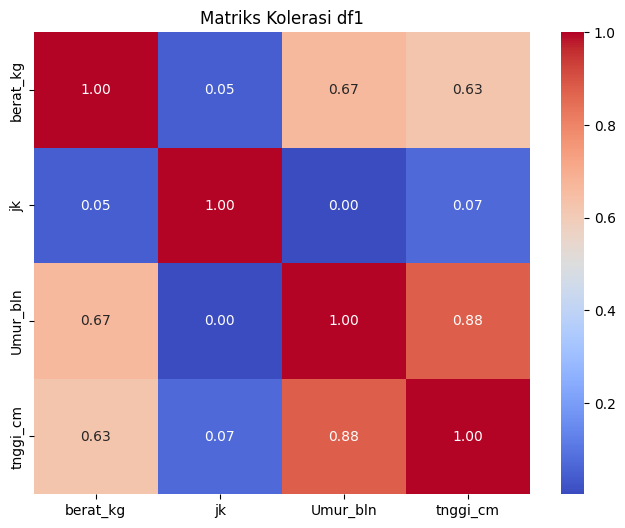

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Kolerasi df1")
plt.show()

Membagi Dataset untuk Training dan Teat

In [23]:
from sklearn.model_selection import train_test_split

# Misalkna target (Y) adalah berat badan, # variable dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # variabel independen
X = df1[["Umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state hasil konsisten
)

# Cetak pembagian data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,Umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


Pemodelan

In [25]:
# Tambahkan konstanta
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,Umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [28]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['Umur_bln']
x2_tinggi = model.params['tinggi_cm']

# Print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-----------------------------
const        2.545617
Umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


Cetak informasi model regresi OLS

In [29]:
# Tampilkan informasi ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:05:59   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

Pengujian model dengan data testing

In [35]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["Umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) # antisiapsi pembagian nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


PRAKTIKUM MANDIRI 03

In [37]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Praktikum_ML/Praktikum03/data/day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melihat informasi umum pada dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Membagi Dataset untuk Training dan Test

In [43]:
from sklearn.model_selection import train_test_split

# Menentukan variabel dependen (Y) dan independen (X)
X = df[['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'season', 'yr']]
y = df['cnt']

# split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# cetak data training
X_train.head()

,temp,atemp,hum,windspeed,weathersit,season,yr
548,0.781667,0.702038,0.447083,0.195267,1,3,1
115,0.631667,0.594083,0.729167,0.326500,1,2,0
272,0.564167,0.544829,0.647500,0.206475,1,4,0
65,0.261739,0.238461,0.551304,0.341352,1,1,0
232,0.710833,0.675525,0.770000,0.248754,1,3,0


Training Model menggunakan regresi linear

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Model

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("Koefisien (pengaruh variabel):", model.coef_)
print("Intercept (nilai dasar cnt):  ", model.intercept_)
print("R² (test):                    ", r2)
print("MAE (jumlah penyewaan):       ", mae)
print("RMSE (jumlah penyewaan):      ", rmse)

Koefisien (pengaruh variabel): [ 2517.97555195  3188.44636858 -1337.59218341 -2524.32656023
  -600.87159197   432.137942    1990.26148893]
Intercept (nilai dasar cnt):   1831.748299951923
R² (test):                     0.6822391007308282
MAE (jumlah penyewaan):        795.6412029290553
RMSE (jumlah penyewaan):       1072.8762133516361


Persamaan regresi

In [50]:
# Ambil slope (koefisien) dan intercept dari model
intercept = model.intercept_
coef = model.coef_

# menampilkan persamaan regresi dengan semua variabel X
print("Persamaan Regresi Linear Berganda:")
persamaan = f"cnt = {intercept:.3f}"
for var, c in zip(X.columns, coef):
    persamaan += f" + ({c:.3f} × {var})"
print(persamaan)

Persamaan Regresi Linear Berganda:
cnt = 1831.748 + (2517.976 × temp) + (3188.446 × atemp) + (-1337.592 × hum) + (-2524.327 × windspeed) + (-600.872 × weathersit) + (432.138 × season) + (1990.261 × yr)


Scatter Plot Regresi antara nilai aktual vs prediksi

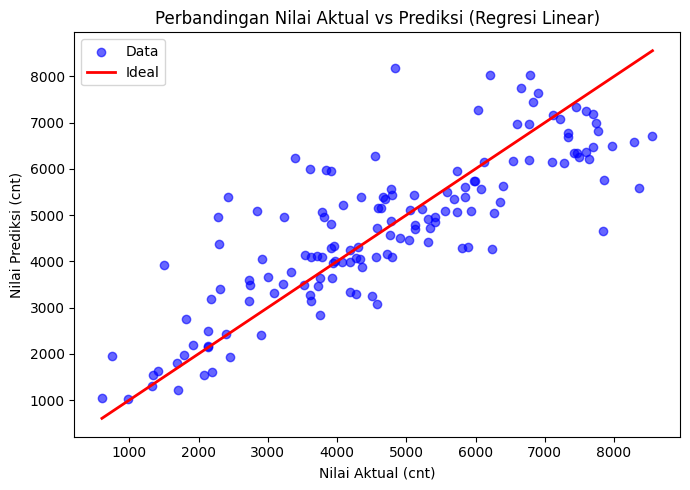

In [52]:
import matplotlib.pyplot as plt

# Scatter antara nilai aktual dan prediksi
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data')

# Garis ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Ideal')

plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Regresi Linear)")
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Prediksi pada data test
y_pred_test = model.predict(X_test)

# Buat tabel hasil (beberapa kolom penting + aktual + prediksi)
hasil = pd.DataFrame({
    "Suhu (temp)": X_test["temp"].to_numpy(),
    "Suhu terasa (atemp)": X_test["atemp"].to_numpy(),
    "Kelembapan (hum)": X_test["hum"].to_numpy(),
    "Kecepatan angin (windspeed)": X_test["windspeed"].to_numpy(),
    "Jumlah Aktual (cnt)": y_test.to_numpy(),
    "Jumlah Prediksi (cnt)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih Error (cnt)"] = hasil["Jumlah Prediksi (cnt)"] - hasil["Jumlah Aktual (cnt)"]

# 2) Akurasi per-baris (100 * (1 - |error| / aktual)), dibatasi 0–100
denom = hasil["Jumlah Aktual (cnt)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (cnt)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan hasil
hasil.head()


,Suhu (temp),Suhu terasa (atemp),Kelembapan (hum),Kecepatan angin (windspeed),Jumlah Aktual (cnt),Jumlah Prediksi (cnt),Selisih Error (cnt),Akurasi (%)
0,0.384167,0.390146,0.905417,0.157975,3228,4950.241893,1722.241893,46.646781
1,0.291667,0.281558,0.786667,0.237562,3959,4329.037634,370.037634,90.653255
2,0.580000,0.563125,0.570000,0.090183,7333,6783.392060,-549.607940,92.505006
3,0.400833,0.397088,0.683750,0.135571,4068,3978.005831,-89.994169,97.787754
4,0.325000,0.311221,0.613333,0.271158,3613,3265.201230,-347.798770,90.373685


In [57]:
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/TI03_AriaKS_0110222076"

!cp -r "/content/drive/MyDrive/Praktikum_ML/Praktikum03" .

!ls -a

!git add .

!git commit -m "praktikum 3 ml"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")
os.system(f'git remote set-url origin https://{token}@github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git')

!git push origin main

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/TI03_AriaKS_0110222076'
/content
.  ..  .config	drive  gdrive  Praktikum03  sample_data
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
Masukkan GitHub Token: ··········
fatal: not a git repository (or any of the parent directories): .git


In [58]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "ariakristallnacht@gmail.com"
!git config --global user.name "Aria Kristallincht"

!git clone https://github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git
%cd   TI03_AriaKS_0110222076

!cp -r /content/drive/MyDrive/Praktikum_ML/Praktikum03/ ./Praktikum03

!ls -lah

!git add .
!git commit -m "praktikum 3 ml"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git')

!git push origin main

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'TI03_AriaKS_0110222076'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 3), reused 26 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 1.02 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/TI03_AriaKS_0110222076
total 24K
drwxr-xr-x 6 root root 4.0K Oct  8 16:42 .
drwxr-xr-x 1 root root 4.0K Oct  8 16:42 ..
drwxr-xr-x 8 root root 4.0K Oct  8 16:42 .git
drwxr-xr-x 5 root root 4.0K Oct  8 16:42 Praktikum01
drwxr-xr-x 5 root root 4.0K Oct  8 16:42 Praktikum02
drwx------ 6 root root 4.0K Oct  8 16:42 Praktikum03
[main a03d3f1] praktikum 3 ml
 7 files changed, 125741 insertions(+)
 create mode 100644 Praktikum03/data/data_anak_ti.csv
 create mode 100644 Praktikum03/data/day.csv
 create mode 100644 Pra